# Yacine Mahdid March 28 2020
This notebook is directly addressing this task: [Github Link for the task](https://github.com/BIAPT/eeg-pain-detection/issues/14)

This notebook is an augmented version of this other one from the [previous milestone](https://github.com/BIAPT/eeg-pain-detection/blob/master/projects/publish_a_paper_on_pain_detection_using_eeg_and_ml/first_cross_validated_ml_model/experiment_7_first_naive_classifier.ipynb).

We will only be using a linear support vector machine from sklearn: [documentation is here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

The cross validation scheme we will be using is a leave one subject out cross validation. We'll assess the classifier performance using accuracy.

For the NaN values we will just set them to 0 for now.

In [33]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Setup
input_filename = '/media/yacine/Data/pain_and_eeg/machine_learning_data/data.csv'

# Experimental Variables
is_healthy = 1
clf = SVC(gamma='auto')

# Load the data and select the right population
df = pd.read_csv(input_filename)
df = df[df.type == is_healthy]

p_ids = df.id.unique();
accuracies = []

df = df.fillna(0)
df = df.drop(['Unnamed: 22'], axis=1)

for p_id in p_ids:
    print("testing " + str(p_id))
    mask = df.id.isin([p_id])
    
    df_test = df[mask]
    df_train = df[~mask]
    
    X_train = df_train.drop(['id', 'type', 'is_hot'], axis=1)
    y_train = df_train.is_hot
    X_test = df_test.drop(['id', 'type', 'is_hot'], axis=1)
    y_test = df_test.is_hot
    
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
print(np.mean(accuracies))

testing 1
testing 2
testing 3
testing 4
testing 5
testing 6
testing 8
testing 9
testing 10
testing 11
testing 12
testing 13
0.5381087968291647


# Results Naive Approach
We have the following results for the training of the Linear SVM
- Healthy : accuracy = 54.784 %
- MSK : accuracy = 57.63 %
- Both : accuracy = 56.18 %

Both represent an improvement over what we had before with only one feature. 
There are a few thing to investigate here before calling it a day:
1. What is the number of participant in each class
2. What is the number of window for baseline and hot
3. Would normalizing the data help the classification? ([Hint: Yes it does](https://neerajkumar.org/writings/svm/))
4. What is the effect of the different type of missing number filling on the accuracy
5. Would doing hyperparameters tuning with GridSearch help in the classification?

These steps will be addressed below

Healthy participant ids:  [ 1  2  3  4  5  6  8  9 10 11 12 13]
Number of Healthy participant:  12
MSK participant ids:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 35 36 37 38 39 41 43 44 45 47 49 51 54 55 57 58
 60 61 62 63 64]
Number of MSK participant:  53


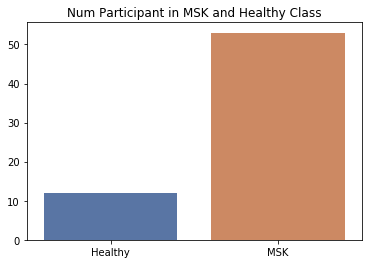

In [34]:
# What is the number of participant in each class
df = pd.read_csv(input_filename) 
is_healthy = 1
healthy_df = df[df.type == is_healthy]
msk_df = df[df.type != is_healthy]

num_healthy = len(healthy_df.id.unique())
num_msk = len(msk_df.id.unique())
print("Healthy participant ids: ", healthy_df.id.unique())
print("Number of Healthy participant: " , num_healthy)
print("MSK participant ids: ", msk_df.id.unique())
print("Number of MSK participant: ", num_msk)

# Making a barplot figure of the amount in each
x = np.array(['Healthy', 'MSK'])
y = np.array([num_healthy, num_msk])
sns.barplot(x=x, y=y, palette="deep").set_title('Num Participant in MSK and Healthy Class')
plt.show()

Num Window in Each State for Healthy
Number window baseline:  1152
Number window hot:  1131
Ratio baseline/hot:  1.0185676392572944


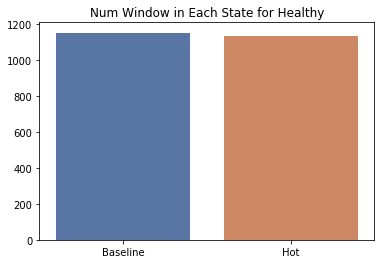

Num Window in Each State for MSK
Number window baseline:  5446
Number window hot:  4867
Ratio baseline/hot:  1.1189644544894186


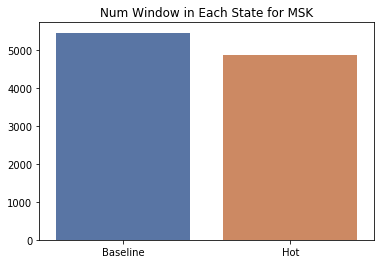

Num Window in Each State for Both Healthy and MSK
Number window baseline:  6598
Number window hot:  5998
Ratio baseline/hot:  1.1000333444481494


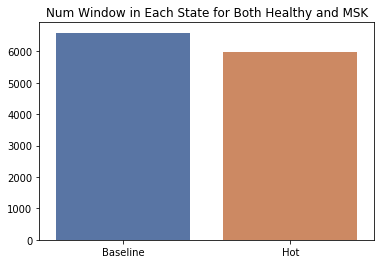

In [35]:
# What is the number of window for baseline and hot
# For this we need three plots: one for healthy, one for msk and one for both together
df = pd.read_csv(input_filename) 
is_healthy = 1

# The three dataframe of interest
healthy_df = df[df.type == is_healthy]
msk_df = df[df.type != is_healthy]
both_df = df

def show_window_stats(df, title):
    '''
        helper function to print the statistic about the amount
        of windows in the dataframe for each state
    '''
    num_window_baseline = len(df[df.is_hot == 0].id)
    num_window_hot = len(df[df.is_hot == 1].id)

    print(title)
    print("Number window baseline: ", num_window_baseline)
    print("Number window hot: ", num_window_hot)
    print("Ratio baseline/hot: ", num_window_baseline/num_window_hot)
    x = np.array(['Baseline', 'Hot'])
    y = np.array([num_window_baseline, num_window_hot])
    sns.barplot(x=x, y=y, palette="deep").set_title(title)
    plt.show()

# Healthy
show_window_stats(healthy_df, 'Num Window in Each State for Healthy')
# Note: It's rougly similar but not exactly, should take that into consideration when doing the training

# MSK
show_window_stats(msk_df, 'Num Window in Each State for MSK')
# Note: It's still roughly similar but 1.15% difference is non-negligeable

show_window_stats(both_df, 'Num Window in Each State for Both Healthy and MSK')
# Note: Still in the same range which is not suprising

Classification of MSK: 
Test: 1
Test: 2
Test: 3
Test: 4
Test: 5
Test: 6
Test: 7
Test: 8
Test: 9
Test: 10
Test: 11
Test: 12
Test: 13
Test: 14
Test: 15
Test: 16
Test: 17
Test: 18
Test: 20
Test: 21
Test: 22
Test: 23
Test: 24
Test: 25
Test: 26
Test: 27
Test: 28
Test: 29
Test: 30
Test: 31
Test: 32
Test: 33
Test: 35
Test: 36
Test: 37
Test: 38
Test: 39
Test: 41
Test: 43
Test: 44
Test: 45
Test: 47
Test: 49
Test: 51
Test: 54
Test: 55
Test: 57
Test: 58
Test: 60
Test: 61
Test: 62
Test: 63
Test: 64
Mean MSK Accuracy: 0.5684604793728579


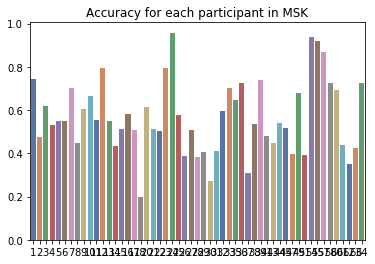

In [37]:
# Would normalizing the data help the classification?
# Some documentation on the subject: https://neerajkumar.org/writings/svm/
# We should do a soft normalization with (mean - x)/*std and train our normalizer on the training data
from sklearn.preprocessing import StandardScaler

# We will bundle our classification loop into it's own function
def classification_norm(df):

    # Classifier we want to use for now
    clf = SVC(gamma='auto')
    scaler = StandardScaler()
    
    p_ids = df.id.unique();
    accuracies = []

    df = df.drop(['Unnamed: 22'], axis=1)
    df = df.fillna(0) # we keep filling NaN values with 0
    
    for p_id in p_ids:
        print("Test: " + str(p_id))
        mask = df.id.isin([p_id])

        df_test = df[mask]
        df_train = df[~mask]

        X_train = df_train.drop(['id', 'type', 'is_hot'], axis=1)
        scaler.fit(X_train) # we fit it ONLY on the training data to not have information leakage
        
        X_train = scaler.transform(X_train)
        
        y_train = df_train.is_hot
                
        X_test = df_test.drop(['id', 'type', 'is_hot'], axis=1)
        X_test = scaler.transform(X_test) # Here we use the trained scaler on the test set
        y_test = df_test.is_hot

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
    return accuracies

# Read the data again
df = pd.read_csv(input_filename) 
is_healthy = 1

# The three dataframe of interest
healthy_df = df[df.type == is_healthy]
msk_df = df[df.type != is_healthy]
both_df = df

def classify_and_show_stats(df, participant_type):
    print(f"Classification of {participant_type}: ")
    acc = classification_norm(df)
    mean_acc = np.mean(acc)
    print(f"Mean {participant_type} Accuracy: {mean_acc}")    

    # Plot of Each Participant Accuracies in the Cross Validation Scheme
    x = np.array(df.id.unique())
    y = np.array(acc)
    sns.barplot(x=x, y=y, palette="deep").set_title(f"Accuracy for each participant in {participant_type}")
    plt.show()
    

# Classify and show the statistic for healthy, msk and both of them together
#classify_and_show_stats(healthy_df, "Healthy")
classify_and_show_stats(msk_df, "MSK")
#classify_and_show_stats(both_df, "Both")

# Note: We have a worsening of the classification for the healthy class because of participant #7
# It sinks the classification since it gives us a 0% in accuracy which is weird.
# This should be investigated further
# We furthermore have participant way above the 50% mark and some below, for MSK we also have very poor participants.
# Something might be up with their respective EEG and should be investigated further.
# All in all we get only marginal improvement for the classification while normalizing, however this is a good thing to do for SVM.

/home/yacine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/yacine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


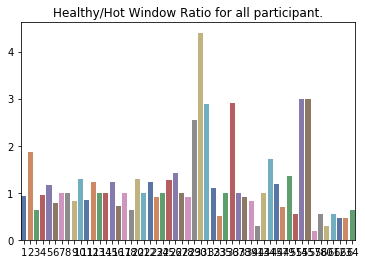

In [9]:
# What is the proportion of baseline and hot windows for each participants?
# We will iterate over the
participant_ids = df.id.unique()
ratios = []
for identity in participant_ids:
    num_window_healthy = len(df[df.id == identity][df.is_hot == 0])
    num_window_hot = len(df[df.id == identity][df.is_hot == 1])
    if num_window_hot == 0:
        ratios.append(-1)
    else:
        ratios.append(num_window_healthy/num_window_hot)
    
    
x = np.array(df.id.unique())
y = np.array(ratios)
sns.barplot(x=x, y=y, palette="deep").set_title(f"Healthy/Hot Window Ratio for all participant.")
plt.show()

# Note:
# Most participant have more Hot than Healthy, but there are some that have way more Healthy than Hot.
# There are some that have very few data points or no data points for Hot or Healthy, this might lead to poor classification.

In [41]:
# Pitfalls we need to be aware of when working with EEG data -> not doing a LOSO cross validation scheme
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# We will bundle our classification loop into it's own function
def classification_norm(df):

    # Classifier we want to use for now
    clf = SVC(gamma='auto')
    scaler = StandardScaler()
    
    p_ids = df.id.unique();
    accuracies = []

    df = df.drop(['Unnamed: 22'], axis=1)
    df = df.fillna(0) # we keep filling NaN values with 0
    
    X = df.drop(['id', 'type', 'is_hot'], axis=1)
    y = df.is_hot
    
    standard_svm_clf = Pipeline([('scaler', scaler), ('svc', clf)])
    scores = cross_val_score(standard_svm_clf, X, y, cv=10) # like in that cold paper
    print(scores)
    return scores

# Read the data again
df = pd.read_csv(input_filename) 
is_healthy = 1

# The three dataframe of interest
healthy_df = df[df.type == is_healthy]
msk_df = df[df.type != is_healthy]
both_df = df

def classify_and_show_stats(df, participant_type):
    print(f"Classification of {participant_type}: ")
    acc = classification_norm(df)
    mean_acc = np.mean(acc)
    print(f"Mean {participant_type} Accuracy: {mean_acc}")    

    # Plot of Each Participant Accuracies in the Cross Validation Scheme
    #x = np.array(df.id.unique())
    #y = np.array(acc)
    #sns.barplot(x=x, y=y, palette="deep").set_title(f"Accuracy for each participant in {participant_type}")
    #plt.show()
    

# Classify and show the statistic for healthy, msk and both of them together
#classify_and_show_stats(healthy_df, "Healthy")
classify_and_show_stats(msk_df, "MSK")
#classify_and_show_stats(both_df, "Both")


Classification of MSK: 
[0.46608527 0.50484496 0.51647287 0.5125969  0.51550388 0.55329457
 0.50048497 0.31067961 0.32912621 0.49417476]
Mean MSK Accuracy: 0.4703263998189051
